In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv("mensD1bball.csv")
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


# Data Cleaning

In [ ]:
df = df.drop(columns=["POSTSEASON", "SEED"], errors="ignore")

df = df.dropna(subset=["W", "ADJOE", "ADJDE", "ADJ_T", "ORB"])

df_clean = df.copy()
df_clean.head()


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2017


# Summary Stats

In [ ]:
df_clean[["ADJOE", "ADJDE", "ADJ_T", "ORB", "W"]].describe()

,ADJOE,ADJDE,ADJ_T,ORB,W
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000
mean,103.151320,103.153250,67.735339,29.308544,15.990633
std,7.264859,6.511989,3.091703,4.214131,6.572893
min,76.600000,84.000000,57.200000,14.400000,0.000000
25%,98.200000,98.400000,65.700000,26.500000,11.000000
50%,102.800000,103.200000,67.700000,29.400000,16.000000
75%,107.900000,107.800000,69.700000,32.100000,21.000000
max,129.100000,124.000000,83.400000,43.600000,38.000000


# Visualization 1: ADJOE vs Wins (Scatter Plot)

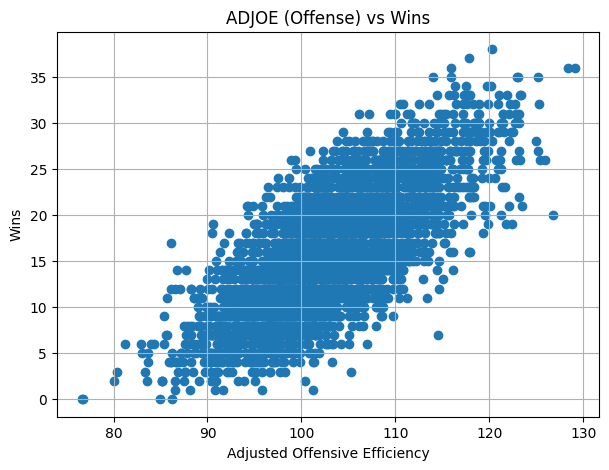

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df_clean["ADJOE"], df_clean["W"])
plt.title("ADJOE (Offense) vs Wins")
plt.xlabel("Adjusted Offensive Efficiency")
plt.ylabel("Wins")
plt.grid(True)
plt.show()


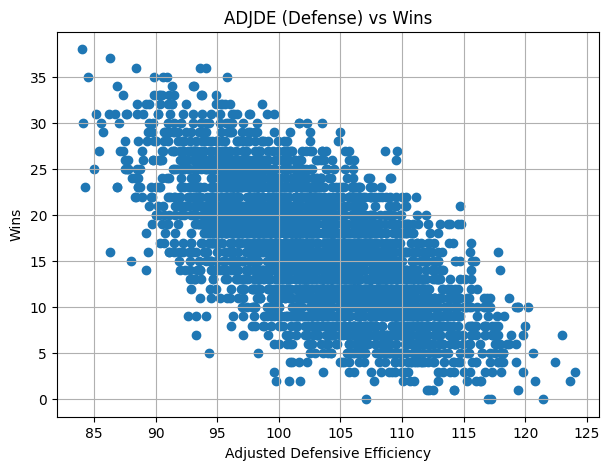

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df_clean["ADJDE"], df_clean["W"])
plt.title("ADJDE (Defense) vs Wins")
plt.xlabel("Adjusted Defensive Efficiency")
plt.ylabel("Wins")
plt.grid(True)
plt.show()


# Visualization 2: Impact of High vs Low Offensive and Defensive Efficiency on Wins

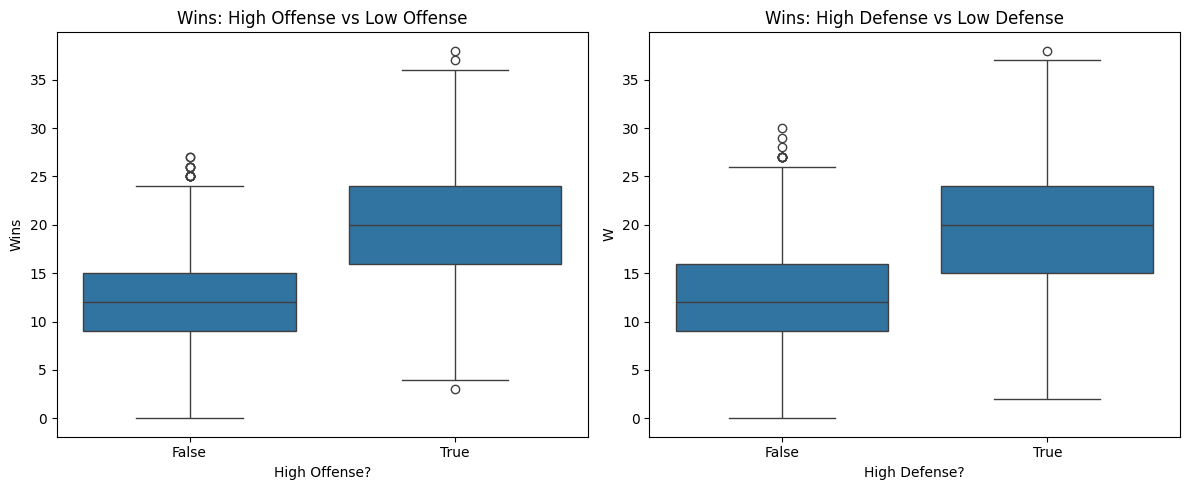

In [ ]:
df_temp = df_clean.copy()
#for offense, higher number is better efficiency, so use > symbol
df_temp["High_Offense"] = df_temp["ADJOE"] > df_temp["ADJOE"].mean()
#for defense, lower number is better efficiency, so use < symbol
df_temp["High_Defense"] = df_temp["ADJDE"] < df_temp["ADJDE"].mean()
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_temp["High_Offense"], y=df_temp["W"])
plt.title("Wins: High Offense vs Low Offense")
plt.xlabel("High Offense?")
plt.ylabel("Wins")

plt.subplot(1,2,2)
sns.boxplot(x=df_temp["High_Defense"], y=df_temp["W"])
plt.title("Wins: High Defense vs Low Defense")
plt.xlabel("High Defense?")

plt.tight_layout()
plt.show()


# Team Win % Based on style (High Offense or High Defense)

In [ ]:
# We calculated high offense and high defense teams based on the mean
# Now we want to categorize and directly compare teams that are "Offensive-heavy" "Defensive-heavy" "both-heavy" and "neither-heavy"

# Offensive-heavy: offensive rating higher than defense
# Defensive-heavy: defensive rating higher than offense

df_temp['Win_PCT'] = df_temp['W']/df_temp['G']

In [ ]:
# Create 4 styles:
# Offense_only: high offense, not high defense
# Defense_only: high defense, not high offense
# Both_high: high on both
# Neither_high: low on both

df_temp["Style"] = np.select(
    [
        (df_temp["High_Offense"] & ~df_temp["High_Defense"]),
        (~df_temp["High_Offense"] & df_temp["High_Defense"]),
        (df_temp["High_Offense"] & df_temp["High_Defense"]),
    ],
    ["Offense_only", "Defense_only", "Both_high"],
    default="Neither_high"
)

In [ ]:
group_stats = df_temp.groupby("Style")["Win_PCT"].agg(["mean", "std", "count"])
print(group_stats)

                  mean       std  count
Style                                  
Both_high     0.658695  0.129850   1160
Defense_only  0.519808  0.146818    593
Neither_high  0.369266  0.139634   1233
Offense_only  0.545387  0.131712    537


In [ ]:
offense_only = group_stats.loc["Offense_only", "mean"]
defense_only = group_stats.loc["Defense_only", "mean"]
print("Offense-only avg win%:", offense_only)
print("Defense-only avg win%:", defense_only)


Offense-only avg win%: 0.545387111202113
Defense-only avg win%: 0.5198075433179106


# Visualization of Win% by Team Style

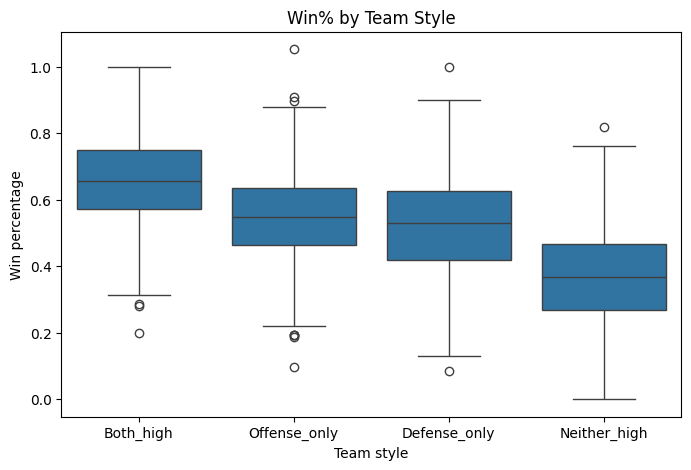

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_temp, x="Style", y="Win_PCT")
plt.title("Win% by Team Style")
plt.xlabel("Team style")
plt.ylabel("Win percentage")
plt.show()


In [ ]:
# Looks like better offense has a slightly higher average for win percentage

In [ ]:
df_temp

cols_to_keep = ["TEAM", "ADJOE", "ADJDE", "ADJ_T", "High_Offense", "High_Defense", "Style", "Win_PCT"]
df_cols_to_keep = df_temp[cols_to_keep]
df_cols_to_keep

# Want to have a look at the key variables that play a role in training and EDA.

,TEAM,ADJOE,ADJDE,ADJ_T,High_Offense,High_Defense,Style,Win_PCT
0,North Carolina,123.3,94.9,71.7,True,True,Both_high,0.825000
1,Wisconsin,129.1,93.6,59.3,True,True,Both_high,0.900000
2,Michigan,114.4,90.4,65.9,True,True,Both_high,0.825000
3,Texas Tech,115.2,85.2,67.5,True,True,Both_high,0.815789
4,Gonzaga,117.8,86.3,71.5,True,True,Both_high,0.948718
...,...,...,...,...,...,...,...,...
3518,Toledo,119.9,109.6,69.5,True,False,Offense_only,0.794118
3519,Liberty,111.4,97.3,64.4,True,True,Both_high,0.818182
3520,Utah Valley,107.1,94.6,69.8,True,True,Both_high,0.823529
3521,UAB,112.4,97.0,70.7,True,True,Both_high,0.763158


In [ ]:
df_temp["Style"].value_counts()

# Want to see the distribution


,count
Style,
Neither_high,1233
Both_high,1160
Defense_only,593
Offense_only,537


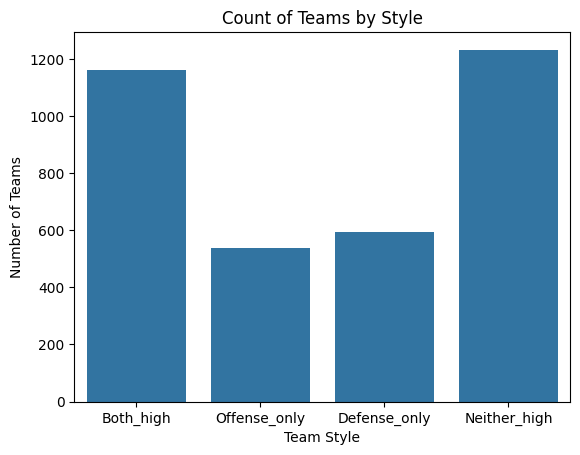

In [ ]:
sns.countplot(data=df_temp, x="Style")
plt.title("Count of Teams by Style")
plt.xlabel("Team Style")
plt.ylabel("Number of Teams")
plt.show()


In [ ]:
# Based on the above plot, our dataset shows majority of teams are not one-sided (only good at defense or only good at offense), they are either strong at both or not that strong at both.
# Also, the sample of offense_only and defense_only are around the same (537 to 593 respectively), so computing their averages or other metrics will not be heavily skewed

# Hypothesis Testing Simulation

With the observed data telling us that higher offense yields higher win percentages, we want to put this further to the test by running simulations

H0 (null): Offense-only teams and Defense_only teams have the same win_pct

H1 (alternative): Offensive-only teams have higher win_pct than Defense_only teams

In [ ]:
# 1. Extract the two groups
off = df_temp.loc[df_temp["Style"] == "Offense_only", "Win_PCT"].dropna()
defn = df_temp.loc[df_temp["Style"] == "Defense_only", "Win_PCT"].dropna()

count_off, count_def = len(off), len(defn)
print("Offense_only count:", count_off, "Defense_only count:", count_def)


Offense_only count: 537 Defense_only count: 593


In [ ]:
# 2. Observed difference in means (offense - defense)
obs_diff = off.mean() - defn.mean()
print("Observed mean win% (offense):", off.mean())
print("Observed mean win% (defense):", defn.mean())
print("Observed diff (off - def):", obs_diff)

Observed mean win% (offense): 0.545387111202113
Observed mean win% (defense): 0.5198075433179106
Observed diff (off - def): 0.02557956788420246


In [ ]:
# 3. Permutation test to simulate null distribution
np.random.seed(0)

pooled = np.concatenate([off.values, defn.values]) # Pool the Win_PCT values of offensive high teams and defensive high teams
n_sims = 10000 # Run considerable number of simulations
diffs = np.empty(n_sims) # Store empty array

for i in range(n_sims):
    perm = np.random.permutation(pooled) # permutate data (pool them up shuffle them into two groups of equal size)
    off_perm = perm[:count_off] # group 1
    def_perm = perm[count_off:] # group 2
    diffs[i] = off_perm.mean() - def_perm.mean() #compute test statistic (mean diff)
# Repeat for each simulation


In [ ]:
# 4. One-sided p-value: P(diff >= observed diff under H0)
p_value = np.mean(diffs >= obs_diff)
print("Permutation p-value (one-sided, offense > defense):", p_value)

Permutation p-value (one-sided, offense > defense): 0.0005


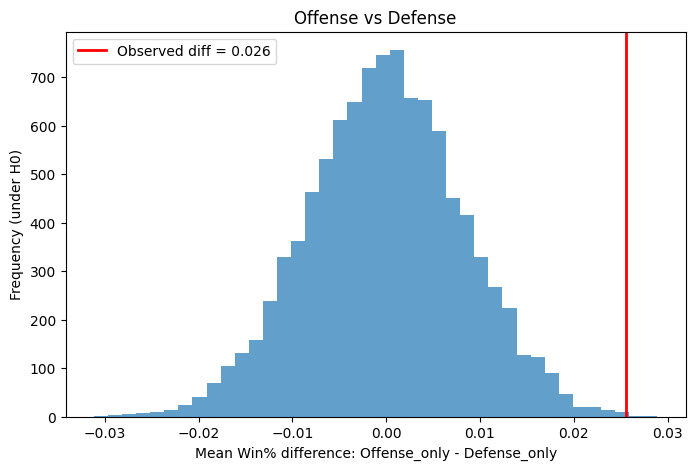

In [ ]:
# 5. Visualize null distribution + observed diff
plt.figure(figsize=(8,5))
plt.hist(diffs, bins=40, alpha=0.7)
plt.axvline(obs_diff, color="red", linewidth=2, label=f"Observed diff = {obs_diff:.3f}")
plt.xlabel("Mean Win% difference: Offense_only - Defense_only")
plt.ylabel("Frequency (under H0)")
plt.title("Offense vs Defense")
plt.legend()
plt.show()

In [ ]:
# This null distribution is centered near 0, while our actual observed difference of about 0.026 (2.6 percentage points) lies far out in the right tail, with fewer than 0.05% shuffles as extreme or more extreme
# Small p-value = 0.0005, so we reject the null hypothesis at alpha = 5% level and conclude that offense-heavy teams tend to win more often than defense-heavy teams by about 2.6%

# Linear Regression Model

In [ ]:
# To get more insights on our data, we will make a small linear regression model that predicts win_pct based on at least 3 features from our dataset

In [ ]:
df_temp.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,YEAR,Win_PCT
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,...,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000
mean,30.486233,15.990633,103.151320,103.153250,0.494067,49.887823,50.087113,18.696509,18.625092,29.308544,...,34.529066,34.802555,49.112433,49.289299,34.185580,34.369316,67.735339,-7.579620,2017.828555,0.516750
std,3.951584,6.572893,7.264859,6.511989,0.255338,3.078505,2.894967,2.104119,2.241067,4.214131,...,5.514264,6.396757,3.400389,3.317012,2.729186,2.435546,3.091703,6.815976,3.257824,0.181686
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,14.400000,...,19.600000,16.500000,37.700000,37.700000,24.900000,26.100000,57.200000,-25.200000,2013.000000,0.000000
25%,29.000000,11.000000,98.200000,98.400000,0.281300,47.900000,48.100000,17.300000,17.100000,26.500000,...,30.600000,30.200000,46.800000,47.100000,32.300000,32.700000,65.700000,-12.600000,2015.000000,0.387097
50%,31.000000,16.000000,102.800000,103.200000,0.475600,49.800000,50.100000,18.600000,18.500000,29.400000,...,34.300000,34.100000,49.000000,49.300000,34.100000,34.300000,67.700000,-7.900000,2018.000000,0.527778
75%,33.000000,21.000000,107.900000,107.800000,0.714250,51.900000,52.000000,20.000000,20.100000,32.100000,...,38.100000,38.800000,51.300000,51.500000,36.000000,36.000000,69.700000,-3.000000,2021.000000,0.648649
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,...,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000,13.100000,2023.000000,1.052632


In [ ]:
# Choose features.
# We decided to include ADJ_T (# of possession per 40 mins)
# Could be helpful in determining win% (basically testing if playing faster or slower relate to winning games)
# Why we want to use it in our case: using only ADJDE and ADJOE can cause a mix up between how good a team's offensive and defensive stats are with how fast they play
# If two teams have the same offensive or defensive stats, but different paces (fast versus slow), then it may reveal more to the story (or possibly not, but we check anyway)
feature_cols = ['ADJOE', 'ADJDE', 'ADJ_T']

X = df_temp[feature_cols]
y = df_temp["Win_PCT"]



In [ ]:
# Train/test/split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [ ]:
# We want to use MinMaxScaler to transform our features by scaling them to the same range (between 0 and 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create an instance of our linear regression model and fit it to our variables
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions with our linear regression model
y_pred = linreg.predict(X_test_scaled)

In [ ]:
# Calculate loss (rmse) and r2 score
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)


In [ ]:
# Print out R2 and RMSE on our test set
print("R-squared:", r2)
print("RMSE:", rmse)

R-squared: 0.5959318804071895
RMSE: 0.013732432942207828


In [ ]:
# See what our coefficients were
print("\nIntercept:", linreg.intercept_)
for name, coef in zip(feature_cols, linreg.coef_):
    print(f"{name}: {coef:.4f}")


Intercept: 0.3778506295112881
ADJOE: 0.6366
ADJDE: -0.4461
ADJ_T: 0.0847


# Data Visualizations

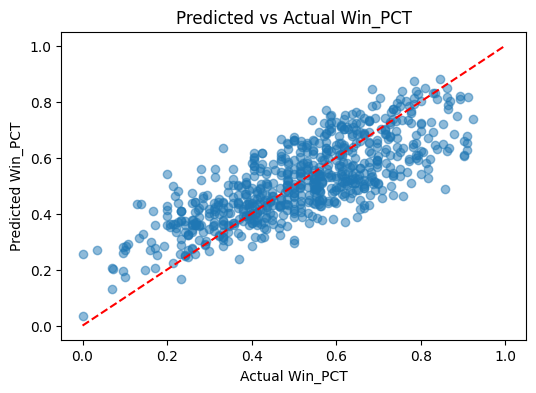

In [ ]:
# Prediction vs. Actual
# Line in the middle (y = x), where predictions matched up with actual win%

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Line of best fit
plt.xlabel("Actual Win_PCT")
plt.ylabel("Predicted Win_PCT")
plt.title("Predicted vs Actual Win_PCT")
plt.show()


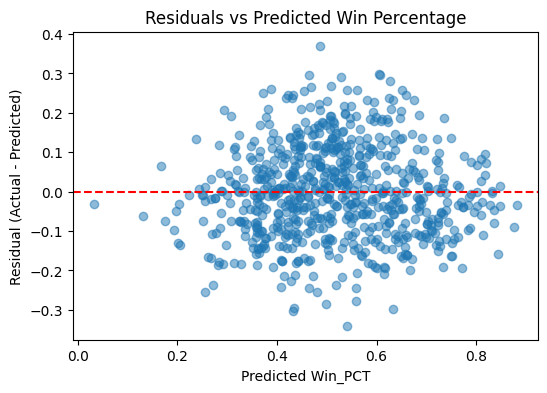

In [ ]:
# Residual plot - if scattered about 0 and not resembling any pattern or shape, then linear regression is reasonable
# By "reasonable" in our case, the model was able to capture a linear relationship between efficiency and win% based on the residual plot check

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Win_PCT")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted Win Percentage")
plt.show()


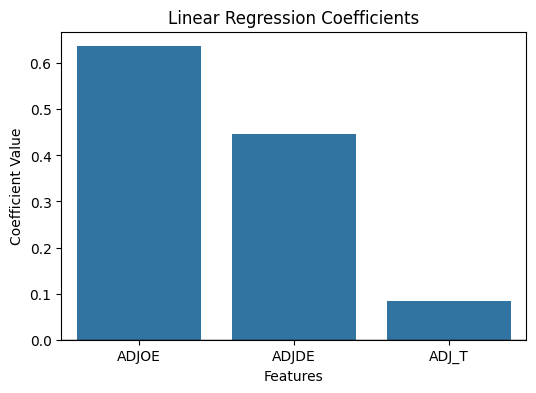

In [ ]:
# Bar plot of the coefficients
# We flipped the sign of ADJDE for the sake of this plot and easily visualizing the three features on the same scale
# Also to avoid potentially misleading one from seeing ADJDE being negative implying that defense can not lead to winning games

coef_series = pd.Series(linreg.coef_, index=feature_cols)
coef_series["ADJDE"] = -coef_series["ADJDE"]

plt.figure(figsize=(6,4))
sns.barplot(x=coef_series.index, y=coef_series.values)
plt.axhline(0, color='k', linewidth=1)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Linear Regression Coefficients")
plt.show()


# Model Evaluation

In [ ]:
# RMSE being approximately 1.4% is really solid.
# The prediction error of win% is typically only 1.4% off.
# R2 score of approximately 60%, meaning that the three variables explain roughly 60% of the variation in win rate

# ADJOE = +0.64
# We know the higher ADJOE, the higher win%.
# Moving from our lowest value to highest value in ADJOE is associated with about a 0.64 increase in win percentage

# ADJDE = -0.45
# We remember lower ADJDE indicates better defense and higher win%
# Improving defense (lowering ADJDE) is associated with about a 0.45 increase in win percentage.

# ADJ_T = +0.085
# Not as significant as the efficiency based on the much smaller coefficient
# Going from slowest to fastest team is associated with about 0.08 increase in win_pct
# Pace matters, but way less than efficiency

# Overall we see offense has a somewhat larger effect than defense

# It is clear that both great offense and defense matter alot
# Though we saw with the hypothesis test as well that offensive-heavy teams had higher win% than
# defense-heavy teams, so it matters a little more.